# Import required dataset/liabraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  Step 1: Data Cleansing & Preprocessing
# • Identify missing values in Age, Purchase Amount, Rating, and Customer Lifetime Value(CLV).

# Import and read dataset

In [11]:
amazon_df=pd.read_excel("/content/Amazon_Customer_Purchase_Data.xlsx")
amazon_df.head()

,Customer_ID,Customer_Name,Age,Gender,Location,Product_Category,Product_ID,Purchase_Date,Purchase_Amount,Payment_Method,Rating,Feedback_Comments,Customer_Lifetime_Value,Loyalty_Score,Discount_Applied,Return_Status,Customer_Segment,Preferred_Shopping_Channel
0,10001,Eve,69.0,Other,Chicago,Books,435,2020-03-07 14:00:00,124.156384,PayPal,3.0,NaN,810.275088,38,No,Yes,New,In-store
1,10001,Charlie,20.0,Male,Los Angeles,Clothing,893,2020-03-11 15:00:00,20.858172,Credit Card,4.0,NaN,161.377968,6,No,No,New,In-store
2,10004,NaN,40.0,Female,New York,Electronics,998,2020-01-16 18:00:00,NaN,Cash,2.0,NaN,NaN,48,No,No,Regular,Online
3,10005,Eve,32.0,Other,Chicago,Toys,581,2020-02-05 22:00:00,453.168418,Cash,4.0,Good,4522.924674,94,No,No,VIP,Both
4,10009,Alice,66.0,Female,New York,Toys,683,2020-01-28 08:00:00,188.434881,Credit Card,3.0,NaN,2741.561300,10,Yes,No,New,Online


# Finding Null values

In [14]:
amazon_df.isnull().sum()

,0
Customer_ID,0
Customer_Name,100
Age,100
Gender,0
Location,0
Product_Category,0
Product_ID,0
Purchase_Date,0
Purchase_Amount,200
Payment_Method,0


# • Apply mean/median imputation for numerical fields.

In [15]:
num_cols = ["Age", "Purchase_Amount", "Rating", "Customer_Lifetime_Value"]

for col in num_cols:
    amazon_df[col].fillna(amazon_df[col].median(), inplace=True)

#amazon_df['Age'] = amazon_df['Age'].fillna(amazon_df['Age'].mean())
#amazon_df['Purchase_Amount']=amazon_df['Purchase_Amount'].fillna(amazon_df['Purchase_Amount'].mean())
#amazon_df['Rating']=amazon_df['Rating'].fillna(amazon_df['Rating'].mean())
#amazon_df['Customer_Lifetime_Value']=amazon_df['Customer_Lifetime_Value'].fillna(amazon_df['Customer_Lifetime_Value'].mean())

/tmp/ipython-input-2166574225.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  amazon_df[col].fillna(amazon_df[col].median(), inplace=True)


In [16]:
amazon_df.isnull().sum()

,0
Customer_ID,0
Customer_Name,100
Age,0
Gender,0
Location,0
Product_Category,0
Product_ID,0
Purchase_Date,0
Purchase_Amount,0
Payment_Method,0


# • Apply mode imputation for categorical fields like Payment Method.

In [17]:
# Calculate mode and store it
feedback_mode = amazon_df['Feedback_Comments'].mode()

# Check if mode exists (column is not all nulls) before filling
if not feedback_mode.empty:
    # Option 1: Assignment (No inplace)
    amazon_df['Feedback_Comments'] = amazon_df['Feedback_Comments'].fillna(feedback_mode[0])
    # Option 2: Inplace (No assignment)
    # amazon_df['Feedback_Comments'].fillna(feedback_mode[0], inplace=True)
else:
    print("Warning: Feedback_Comments is empty. Please re-run the data loading cell.")

In [18]:
amazon_df.isnull().sum()

,0
Customer_ID,0
Customer_Name,100
Age,0
Gender,0
Location,0
Product_Category,0
Product_ID,0
Purchase_Date,0
Purchase_Amount,0
Payment_Method,0


In [19]:
amazon_df['Feedback_Comments']

,Feedback_Comments
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
1995,Good
1996,Good
1997,Good
1998,Average


# Removing Duplicates
# • Remove duplicate entries based on Customer_ID and Purchase_Date.
# No duplicate based on Purchse_date so applying based on Customer_id

In [20]:
amazon_df['Purchase_Date'].duplicated().sum()

np.int64(0)

In [21]:
amazon_df['Customer_ID'].duplicated().sum()

np.int64(200)

In [22]:
amazon_df.drop_duplicates(subset=['Customer_ID'],inplace=True)

In [23]:
amazon_df['Customer_ID'].duplicated().sum()

np.int64(0)

#  Data Formatting & Type Correction
# • Convert Purchase_Date to datetime format.
# check type for "Purchase_date" column

In [24]:
amazon_df['Purchase_Date'].dtypes

dtype('<M8[ns]')

In [25]:
amazon_df['Purchase_Date']=pd.to_datetime(amazon_df['Purchase_Date'])

In [26]:
amazon_df['Purchase_Date'].dtypes

dtype('<M8[ns]')

# • Standardize categorical values (e.g., Gender: Male, Female, Other).

In [27]:
amazon_df['Gender'].unique()


array(['Other', 'Female', 'Male'], dtype=object)

In [28]:
amazon_df["Gender"] = amazon_df["Gender"].str.capitalize()
# Fix: Remove ', inplace=True' to correct the syntax error and avoid setting the column to None
amazon_df["Gender"] = amazon_df["Gender"].replace({"M": "Male", "F": "Female", "O": "Other"})
amazon_df['Gender']

,Gender
0,Other
2,Female
3,Other
4,Female
7,Female
...,...
1995,Other
1996,Other
1997,Female
1998,Male


# • Ensure consistent data types (integers for numeric fields, categorical encoding for nonnumeric)

In [29]:
amazon_df.dtypes

,0
Customer_ID,int64
Customer_Name,object
Age,float64
Gender,object
Location,object
Product_Category,object
Product_ID,int64
Purchase_Date,datetime64[ns]
Purchase_Amount,float64
Payment_Method,object


In [30]:
amazon_df['Age']=amazon_df['Age'].astype(int)
amazon_df['Purchase_Amount']=amazon_df['Purchase_Amount'].astype(int)
amazon_df['Age'].dtypes

dtype('int64')

In [31]:
amazon_df['Purchase_Amount'].dtypes

dtype('int64')

 # Handling Outliers
##• Identify outliers in Purchase Amount & CLV using boxplots & z-score analysis.
##• Apply winsorization or remove extreme outliers

In [32]:
from scipy.stats import zscore # Z-score method to identify and remove extreme outliers from your data
z_scores = np.abs(zscore(amazon_df[['Purchase_Amount','Customer_Lifetime_Value']])) # It calculates how many standard deviations each value in 'Purchase_Amount' and 'Customer_Lifetime_Value' is from the mean.
threshold = 3 #  In a normal distribution, about 99.7% of data falls within 3 standard deviations. Setting the threshold to 3 is a standard way to catch points that are highly unlikely to occur.
amazon_df = amazon_df[(z_scores < threshold).all(axis=1)] # This checks every row and ensures that it is kept only if all of its numerical columns are within the threshold.

# Step 2: Machine Learning Tasks
## After data cleaning and feature engineering, we apply Machine Learning models to derive insights
##  Customer Segmentation (Clustering - K-Means)
 ## Objective:

• Categorize Amazon customers into distinct groups based on spending patterns, purchase
frequency, and loyalty scores.

• Identify high-value, occasional, and low-value customers for targeted promotions.

 ## Method:

• Use K-Means Clustering to segment customers into groups based on:

  • Total purchase amount

  • Number of orders

• Loyalty score

 ## Industry Application:

• Helps Amazon personalize recommendations and promotions for different customer
segments.

• Enables dynamic pricing strategies based on customer type.


# Predicting Customer Lifetime Value (Regression - Linear Regression)
 ## Objective:

• Estimate the future revenue Amazon can generate from each customer.

• Identify high-CLV customers and offer exclusive deals to increase retention.

 ## Method:
• Train a Linear Regression model to predict CLV based on:

• Age, past purchases, discount usage, payment method, and loyalty score.

 ## Industry Application:

• Helps Amazon in predictive marketing and resource allocation.

• Enables cost-efficient retention strategies.

# Select Features for Clustering

## We use:

## Total_Purchase_Amount

## Number_of_Orders

## Loyalty_Score

In [33]:
customer_df=amazon_df.groupby("Customer_ID").agg(
    Total_Purchase_Amount=("Purchase_Amount", "sum"),
    Number_of_Orders=("Purchase_Amount", "count"),
    Loyalty_Score=("Loyalty_Score", "mean")
).reset_index()
customer_df.head()

,Customer_ID,Total_Purchase_Amount,Number_of_Orders,Loyalty_Score
0,10001,124,1,38.0
1,10004,257,1,48.0
2,10005,453,1,94.0
3,10009,188,1,10.0
4,10011,89,1,90.0


In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_feature = scaler.fit_transform(customer_df[['Total_Purchase_Amount', 'Number_of_Orders', 'Loyalty_Score']])

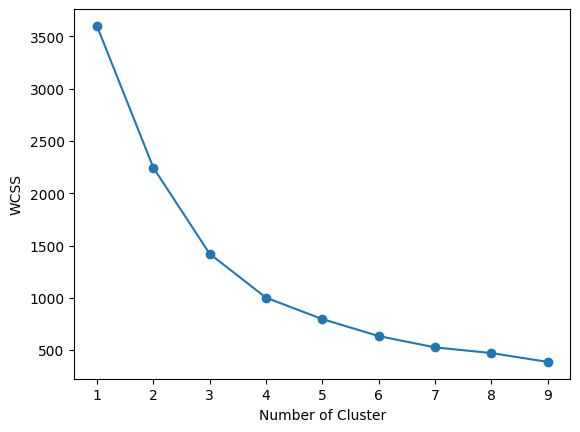

In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcs=[]
for k in range(1,10):
  kmeans=KMeans(n_clusters=k,random_state=42)
  kmeans.fit(scaled_feature)
  wcs.append(kmeans.inertia_)

plt.plot(range(1,10),wcs,marker="o")
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()

In [56]:
# apply K-menas clustering
kmeans=KMeans(n_clusters=3,random_state=42)
customer_df["cluster"]=kmeans.fit_predict(scaled_feature)
customer_df.head()

,Customer_ID,Total_Purchase_Amount,Number_of_Orders,Loyalty_Score,cluster
0,10001,124,1,38.0,2
1,10004,257,1,48.0,0
2,10005,453,1,94.0,1
3,10009,188,1,10.0,0
4,10011,89,1,90.0,2


In [43]:
# Interpret Clusters by grouping by the 'cluster' labels generated by KMeans
customer_df.groupby("cluster").mean()

,Customer_ID,Total_Purchase_Amount,Number_of_Orders,Loyalty_Score
cluster,,,,
0,15013.344101,269.727528,1.0,22.317416
1,14935.767055,362.785358,1.0,74.054908
2,15066.232033,108.367556,1.0,66.605749


In [44]:
# Predict CLV using:
# Age, Past purchases, Discount usage, Payment method, Loyalty score

features= amazon_df[[
    "Age",
    "Purchase_Amount",
    "Loyalty_Score",
    "Discount_Applied",
    "Payment_Method"
]]
target=amazon_df["Customer_Lifetime_Value"]


In [57]:
# Encode Categorical Variables

features_encode=pd.get_dummies(features,
    columns=["Discount_Applied", "Payment_Method"],
    drop_first=True)

In [46]:
# Train–Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features_encode,target,test_size=0.2,random_state=42)

In [47]:
x_train

,Age,Purchase_Amount,Loyalty_Score,Discount_Applied_Yes,Payment_Method_Cash,Payment_Method_Credit Card,Payment_Method_PayPal
911,38,453,2,True,False,True,False
915,32,438,78,True,True,False,False
1225,43,128,74,False,True,False,False
941,48,410,18,False,False,True,False
620,43,42,49,False,False,False,True
...,...,...,...,...,...,...,...
1256,62,470,17,False,False,False,True
1442,55,417,71,False,False,True,False
942,35,12,4,True,True,False,False
1625,32,223,62,True,False,True,False


In [48]:
x_test

,Age,Purchase_Amount,Loyalty_Score,Discount_Applied_Yes,Payment_Method_Cash,Payment_Method_Credit Card,Payment_Method_PayPal
1767,44,292,44,False,False,False,True
1034,36,414,95,True,False,True,False
952,59,240,48,True,False,True,False
177,43,388,30,False,False,True,False
1416,28,112,96,True,False,True,False
...,...,...,...,...,...,...,...
839,52,143,57,False,False,True,False
1631,32,210,85,False,False,False,False
1929,54,184,62,True,False,False,True
1414,64,325,43,True,True,False,False


In [50]:
# Train Linear Regression Model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [51]:
# Model Evaluation

In [53]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
y_pred=model.predict(x_test)
print("R2 Score:",r2_score(y_test,y_pred)) # R² → How well features explain CLV
print("MAE =",mean_absolute_error(y_test,y_pred)) # MAE → Average CLV prediction error

R2 Score: 0.7281588503353016
MAE = 618.0195051216199


In [55]:
# Feature Importance
coefficients = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient',ascending=False)

coefficients


,Feature,Coefficient
1,Purchase_Amount,9.756741
0,Age,-0.741374
2,Loyalty_Score,-1.206638
6,Payment_Method_PayPal,-28.006441
4,Payment_Method_Cash,-29.855918
5,Payment_Method_Credit Card,-33.162086
3,Discount_Applied_Yes,-75.264826


# Shows below drives customer value:

# Loyalty score

# Purchase amount

# Discount behavior impact

# Logistic Regression model for churn prediction.

## A customer is considered churned if:

## They have low loyalty score, and

## They have low purchase activity

# Create Target Variable: Churn

## 1 → Churned customer

## 0 → Retained customer

In [60]:
amazon_df["Churn"]=np.where(
    (amazon_df["Loyalty_Score"] < amazon_df["Loyalty_Score"].median()) &
    (amazon_df["Purchase_Amount"] < amazon_df["Purchase_Amount"].median()),
    1,
    0
)

# Input Features

## We use customer behavior and demographic features:

## Age, Purchase Amount, Loyalty Score, Discount Applied, Payment Method

# Target

## Churn

In [61]:
x = amazon_df[[
    "Age",
    "Purchase_Amount",
    "Loyalty_Score",
    "Discount_Applied",
    "Payment_Method"
]]

y = amazon_df["Churn"]

In [62]:
# Encoding Categorical Variables
# Converts categories into binary columns

X_encoded = pd.get_dummies(
    x,
    columns=["Discount_Applied", "Payment_Method"],
    drop_first=True
)

In [65]:
# Train–Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y # stratify=y keeps churn ratio balanced
)

In [66]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
# Train Logistic Regression Model

from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [70]:
# Model Prediction

y_pred = log_model.predict(X_test_scaled)
y_prob = log_model.predict_proba(X_test_scaled)[:, 1]

# y_pred → churn / no churn

# y_prob → probability of churn

In [73]:
# Model Evaluation
# Confusion Matrix & Metrics

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Precision → How accurate churn predictions are

# Recall → How many churners were correctly identified

# F1-score → Balance between precision & recall

# Accuracy → Overall correctness

[[264  16]
 [ 23  57]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       280
           1       0.78      0.71      0.75        80

    accuracy                           0.89       360
   macro avg       0.85      0.83      0.84       360
weighted avg       0.89      0.89      0.89       360



In [75]:
# Feature Importance

importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": log_model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

importance

# Positive coefficient → increases churn probability

# Negative coefficient → reduces churn probability

,Feature,Coefficient
6,Payment_Method_PayPal,0.269919
3,Discount_Applied_Yes,0.207977
0,Age,0.180492
5,Payment_Method_Credit Card,0.124578
4,Payment_Method_Cash,0.018926
2,Loyalty_Score,-2.822882
1,Purchase_Amount,-2.998227


# Visualization 1: Churn Distribution (Bar Chart)

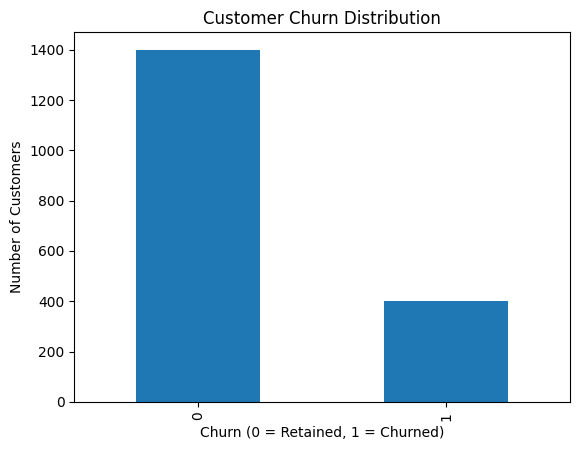

In [77]:
plt.figure()
amazon_df["Churn"].value_counts().plot(kind="bar")
plt.xlabel("Churn (0 = Retained, 1 = Churned)")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Distribution")
plt.show()

# Visualization 2: Loyalty Score vs Churn (Boxplot)

## Purpose

## Analyzes relationship between loyalty score and churn

<Figure size 640x480 with 0 Axes>

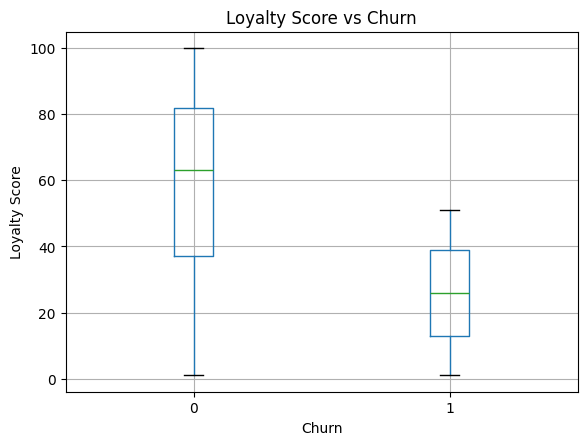

In [78]:
plt.figure()
amazon_df.boxplot(column="Loyalty_Score", by="Churn")
plt.xlabel("Churn")
plt.ylabel("Loyalty Score")
plt.title("Loyalty Score vs Churn")
plt.suptitle("")
plt.show()

# Interpretation

## Churned customers have lower loyalty scores

## Loyalty score is a strong churn predictor

# Visualization 3: Purchase Amount vs Churn (Boxplot)

## Purpose

## Compares spending behavior of churned vs retained customers

<Figure size 640x480 with 0 Axes>

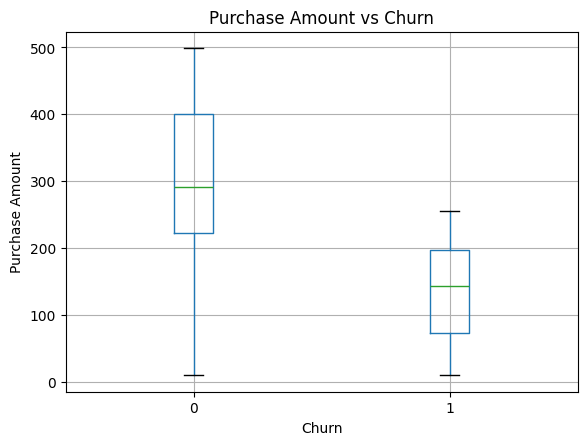

In [79]:
plt.figure()
amazon_df.boxplot(column="Purchase_Amount", by="Churn")
plt.xlabel("Churn")
plt.ylabel("Purchase Amount")
plt.title("Purchase Amount vs Churn")
plt.suptitle("")
plt.show()

# Interpretation

## Churned customers spend less

## Retained customers show higher average purchases